In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import utils
import envs
import plots
import optim
import gym

In [2]:
%matplotlib inline

In [3]:
env = envs.blackjack
print(env.nA, env.nS)

2 (32, 11, 2)


In [4]:
params = dict(
    num_episodes=3000,
    repetitions=100,
    reduction = "mean",
    # hyperparameters
    discount_factor=1.0,
    alpha=0.1,
    epsilon=0.1,
)
smoothing_radius = 50

In [5]:
ep_lengths_q_learning, ep_returns_q_learning = optim.q_learning(env, **params)
ep_lengths_dbl_q_learning, ep_returns_dbl_q_learning = optim.double_q_learning(env, **params)

100%|██████████| 100/100 [01:08<00:00,  1.47it/s]                                                                                                     


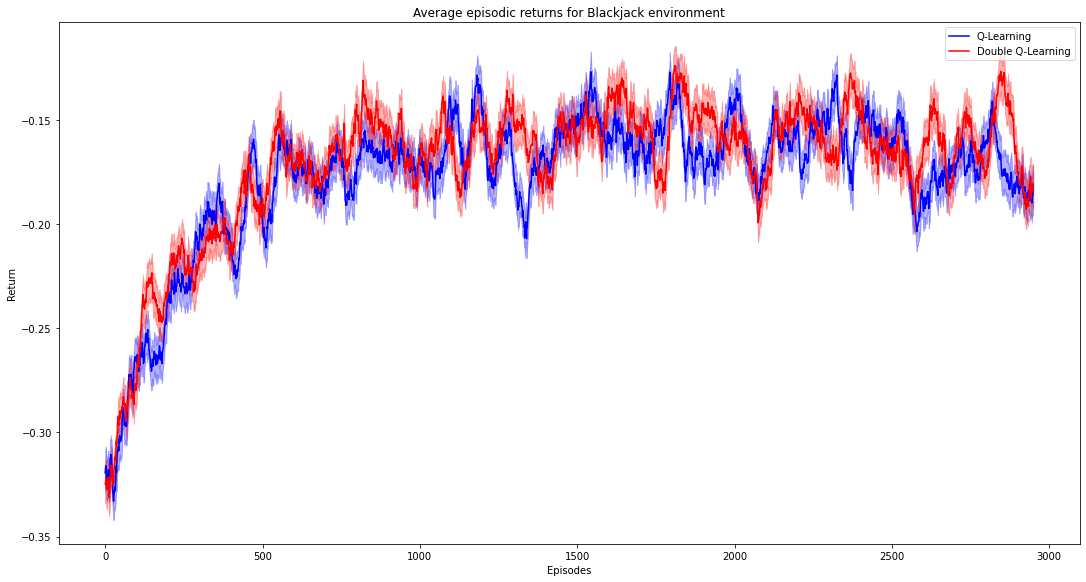

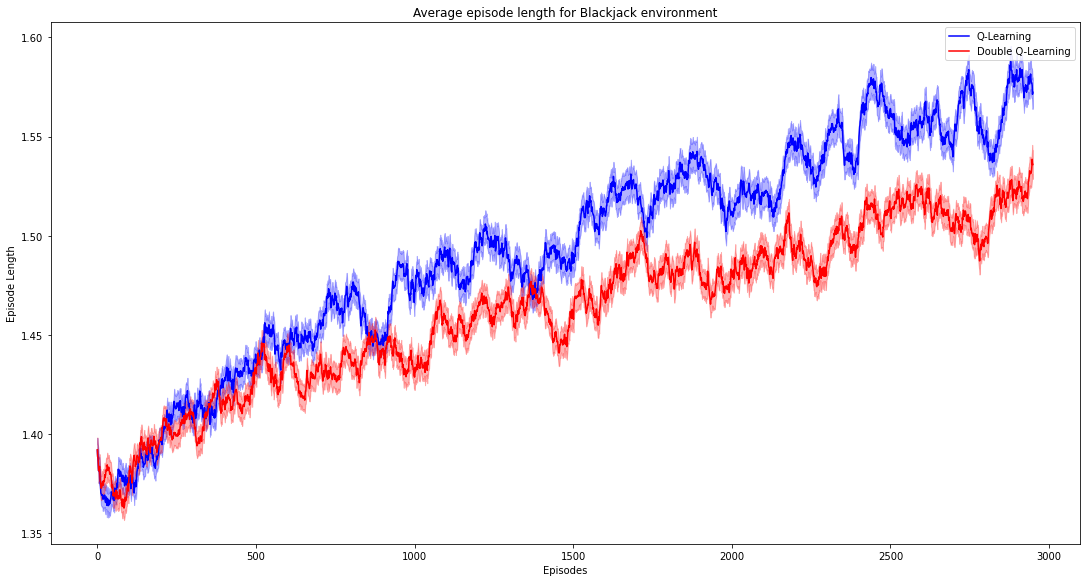

In [6]:
plots.plot_values([
        (dict(label="Q-Learning", color="blue"), ep_returns_q_learning),
        (dict(label="Double Q-Learning", color="red"), ep_returns_dbl_q_learning),
    ],
    smoothing_radius=smoothing_radius,
    title="Average episodic returns for Blackjack environment",
    confidence_band_scale=0.01,
    legend=True,
    xlabel="Episodes", ylabel="Return",
    savefig="../figs/blackjack_average_episodic_returns.pdf",
)
plots.plot_values([
        (dict(label="Q-Learning", color="blue"), ep_lengths_q_learning),
        (dict(label="Double Q-Learning", color="red"), ep_lengths_dbl_q_learning),
    ],
    smoothing_radius=smoothing_radius,
    title="Average episode length for Blackjack environment",
    confidence_band_scale=0.01,
    legend=True,
    xlabel="Episodes", ylabel="Episode Length",
    savefig="../figs/blackjack_average_episode_length.pdf"
)